## Un primer boceto de la info que hay en judobase

### Importar funciones

Todo ha sido descargado previamente y almacenado en una base de datos:

In [1]:
from lib import SQLiteConnection

import pandas as pd
pd.options.display.max_colwidth = 100

In [3]:
conn = SQLiteConnection('../judo_big.sql')

### Battles Estrella

Dataframe que contiene la info de batallas

In [4]:
df = conn.as_pandas('select * from actions')

In [5]:
df.local.unique()

array(['COHEN Gili', 'DELGADO Angelica', 'KELMENDI Majlinda',
       'PRIMO Gefen', 'GILES Chelsie', 'BABAMURATOVA Gulbadam',
       'EASTON Tinka', 'LOPEZ SHERIFF Estrella', 'CHITU Andreea',
       'KOCHER Fabienne', 'KUZNETSOVA Alesya', 'ZIYAEVA Gulnoza',
       'BOBRIKOVA Daria', 'JANASHVILI Mariam', 'FOFANA Salimata',
       'KAKKO Katri', 'KELDIYOROVA Diyora', 'MOKDAR Faiza'], dtype=object)

In [9]:
nombre = 'KELMENDI Majlinda'

In [10]:
df_comp = df[df.local==nombre].copy()

In [11]:
df_comp.time = df_comp.time.apply(lambda t: int(t.split(':')[0])*60 + int(t.split(':')[1]))

In [12]:
df_comp['minute'] = (df_comp.time.astype(int) / 60).astype(int)

In [13]:
dict_action_simple = {
    'Shido': 'sancion', 
    'HSK (3rd shido)': 'sancion', 
    'Hansoku-Make': 'sancion',
    'Yuko': 'marca',
    'Waza-ari': 'marca', 
    'Waza-Ari-awasete-ippon': 'marca',
    'Ippon': 'marca', 
    'Cancel Yuko': 'cancel',
    'Cancel Waza-ari': 'cancel', 
    'Cancel Ippon': 'cancel', 
    'Cancel Shido': 'cancel'
}

df_comp['action_simple'] = df_comp.action.map(dict_action_simple)

dict_action_simple_2 = {
    0: {'sancion': 'shido_other', 'marca': 'le_marcan', 'cancel': 'cancel'}, 
    1: {'sancion': 'shido_ella', 'marca': 'marca_ella', 'cancel': 'cancel'}
}

df_comp['action_simple'] = df_comp.apply(lambda a: dict_action_simple_2[a.you][a.action_simple], axis=1)

Cada fila es una acción en un combate, donde:

__you__ = 1 significa que es tuyo (el shido, wazari...)  
__you__ = 0 significa que es del oponente

In [15]:
df_comp.head(10)

,local,opponent,you,action,action_detail,time,url_youtube,event,minute,action_simple
246,KELMENDI Majlinda,TSCHOPP Evelyne,1,Ippon,Koshi-waza / Tsurikomi-goshi,124,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0035,Grand Prix Tashkent 2018,2,marca_ella
247,KELMENDI Majlinda,PEREZ BOX Ana,1,Ippon,Te-waza / Uki-otoshi,44,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0032,Grand Prix Tashkent 2018,0,marca_ella
248,KELMENDI Majlinda,PUPP Reka,0,Shido,Shido / Undetermined,49,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0028,Grand Prix Tashkent 2018,0,shido_other
249,KELMENDI Majlinda,PUPP Reka,0,Shido,Shido / Escape-With-Head,68,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0028,Grand Prix Tashkent 2018,1,shido_other
250,KELMENDI Majlinda,PUPP Reka,1,Shido,Shido / Non-Combativity,151,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0028,Grand Prix Tashkent 2018,2,shido_ella
251,KELMENDI Majlinda,PUPP Reka,1,Waza-ari,Koshi-waza / Tsurikomi-goshi,218,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0028,Grand Prix Tashkent 2018,3,marca_ella
252,KELMENDI Majlinda,RUBINSTEIN Madelene,0,Shido,Shido / Avoid-Grip,33,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0024,Grand Prix Tashkent 2018,0,shido_other
253,KELMENDI Majlinda,RUBINSTEIN Madelene,1,Ippon,Koshi-waza / Harai-goshi,50,https://judobase.ijf.org/#/competition/contest/gp_uzb2018_w_0052_0024,Grand Prix Tashkent 2018,0,marca_ella
254,KELMENDI Majlinda,GIUFFRIDA Odette,1,Shido,Shido / Non-Combativity,110,https://judobase.ijf.org/#/competition/contest/gs_uae2018_w_0052_0035,Grand Slam Abu Dhabi 2018,1,shido_ella
255,KELMENDI Majlinda,GIUFFRIDA Odette,0,Ippon,Other / Kiken gachi,195,https://judobase.ijf.org/#/competition/contest/gs_uae2018_w_0052_0035,Grand Slam Abu Dhabi 2018,3,le_marcan


In [16]:
total_acciones = df_comp.shape[0]
total_batallas = df_comp[["opponent", "event"]].drop_duplicates().shape[0]

In [17]:
print(f'Es decir, un total de {total_acciones} acciones en {total_batallas} batallas')

Es decir, un total de 93 acciones en 33 batallas


In [18]:
resumen = dict()

In [19]:
resumen['total_batallas'] = total_batallas

In [20]:
golden_score = (df_comp.groupby(["opponent", "event"]).time.max() > 240).sum()
resumen['golden_score'] = f'{golden_score} ({str(golden_score / total_batallas *100)}%)'

In [21]:
battles = conn.as_pandas(f'select * from battles where local="{nombre}"', 
                         index_col='index').sort_values('date', ascending=False)
temp = df_comp.groupby(["opponent", "event"]).time.max()
golden_score_wins = battles.set_index(['opponent', 'event']).loc[temp.index[temp > 240]].wins.sum()
resumen['golden_score_wins'] = f'{golden_score_wins} ({golden_score_wins / golden_score * 100}%)'

In [22]:
resumen

{'golden_score': '4 (12.1212121212%)',
 'golden_score_wins': '3 (75.0%)',
 'total_batallas': 33}

Agrupamos por sujeto y acción

In [23]:
grouped_actions = df_comp.groupby(['you', 'action']).size() 
grouped_actions

you  action                
0    Cancel Shido               2
     HSK (3rd shido)            5
     Ippon                      2
     Shido                     39
     Waza-ari                   3
1    Ippon                     10
     Shido                     14
     Waza-Ari-awasete-ippon     2
     Waza-ari                  13
     Yuko                       3
dtype: int64

In [24]:
print(f'Por ejemplo, hiciste {grouped_actions[1, "Ippon"]} Ippones y recibiste {grouped_actions[1, "Shido"]} Shidos')

Por ejemplo, hiciste 10 Ippones y recibiste 14 Shidos


### Acciones por minuto

In [27]:
import seaborn as sns

In [29]:
grouped_actions = df_comp.groupby(['minute', 'action_simple']).size()
grouped_actions

minute  action_simple
0       cancel            1
        marca_ella        9
        shido_ella        2
        shido_other      13
1       le_marcan         1
        marca_ella        7
        shido_ella        1
        shido_other      15
2       le_marcan         1
        marca_ella        7
        shido_ella        3
        shido_other       9
3       cancel            1
        le_marcan         2
        marca_ella        4
        shido_ella        7
        shido_other       5
4       marca_ella        1
        shido_other       1
5       shido_other       1
8       shido_ella        1
9       le_marcan         1
dtype: int64

In [30]:
ga = grouped_actions.to_frame().reset_index().rename(columns={0: 'count'})

In [31]:
ga.head()

,minute,action_simple,count
0,0,cancel,1
1,0,marca_ella,9
2,0,shido_ella,2
3,0,shido_other,13
4,1,le_marcan,1


In [190]:
%matplotlib notebook

In [197]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


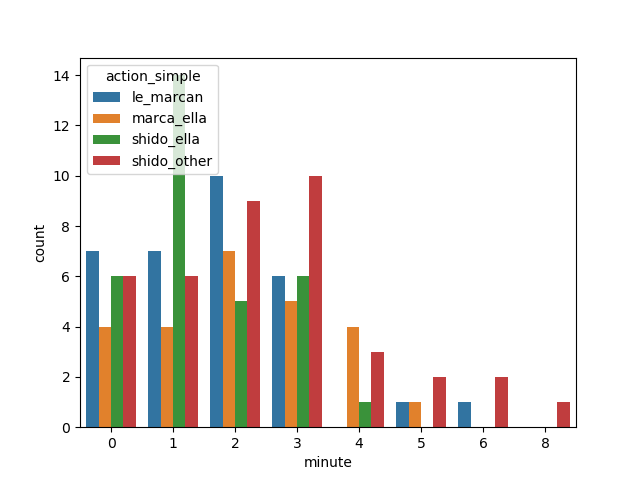

In [198]:
fig, ax = plt.subplots()
sns.barplot(x="minute", y="count", hue="action_simple", data=ga.query('action_simple!="cancel"'))

<IPython.core.display.Javascript object>


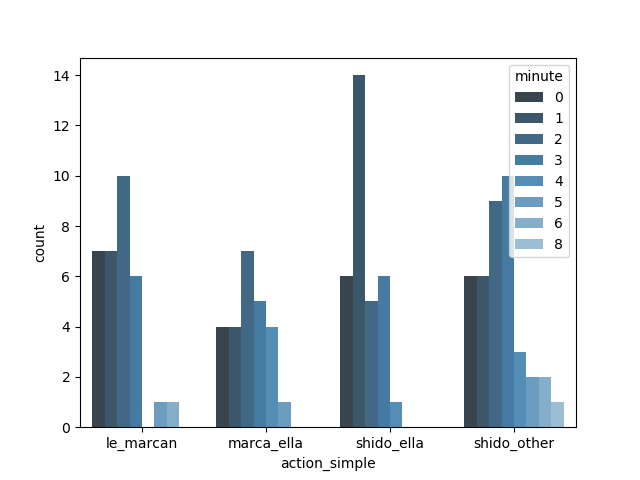

In [199]:
fig, ax = plt.subplots()
ax = sns.barplot(x="action_simple", y="count", hue="minute", data=ga.query('action_simple!="cancel"'), palette="Blues_d")

### Detail Estrella

In [251]:
gad = df.groupby(['you', 'action_detail']).size().to_frame().reset_index().rename(columns={0: 'count', 'you': 'a_quien'})
shidos = gad[gad.action_detail.str.contains('Shido')].copy()
shidos.action_detail = shidos.action_detail.str.slice(7)

In [252]:
shidos.a_quien = shidos.a_quien.map({0: 'al_otro', 1: 'a_ella'})

In [253]:
shidos.head()

,a_quien,action_detail,count
29,al_otro,Avoid-Grip,13
30,al_otro,Defensive-Posture,13
31,al_otro,False-Attack,38
32,al_otro,Hold-Same-Side,2
33,al_otro,Hold-Sleeve-Ends,4


<IPython.core.display.Javascript object>


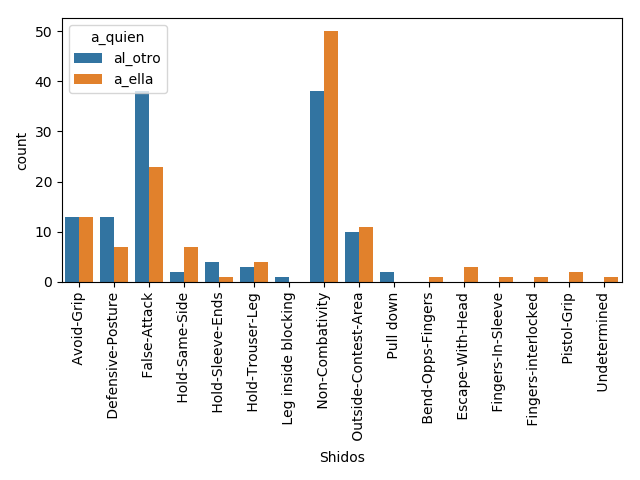

Text(0.5,-116.103,'Shidos')

In [254]:
fig, ax = plt.subplots()
ax = sns.barplot(x="action_detail", y="count", hue="a_quien", data=shidos)
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.tight_layout()
ax.set_xlabel('Shidos')

<IPython.core.display.Javascript object>


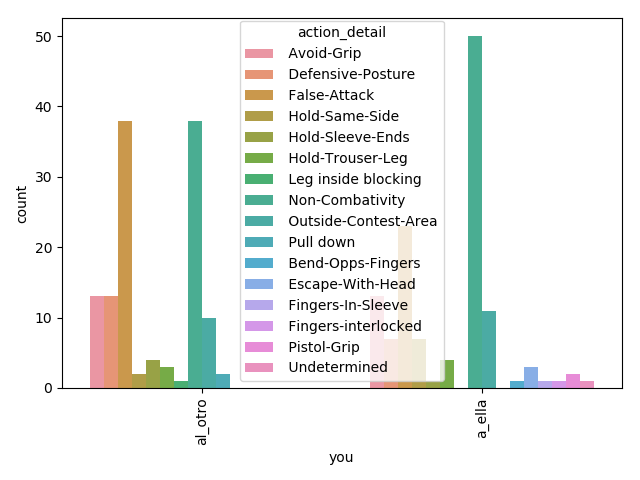

In [234]:
fig, ax = plt.subplots()
ax = sns.barplot(x="you", y="count", hue="action_detail", data=shidos)
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.tight_layout()

### Battles Gaitero

In [9]:
# dataframe containing battles info
df = conn.as_pandas('select * from gaite')

Cada fila es una acción en un combate, donde:

__you__ = 1 significa que es tuyo (el shido, wazari...)  
__you__ = 0 significa que es del oponente

In [10]:
df.head(10)

,opponent,you,action,action_detail,time,url_youtube,event
0,SHMAILOV Baruch,1,Shido,Shido / False-Attack,00:22,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
1,SHMAILOV Baruch,0,Shido,Shido / False-Attack,01:28,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
2,SHMAILOV Baruch,1,Shido,Shido / Hold-Trouser-Leg,03:55,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
3,SHMAILOV Baruch,0,Ippon,Ashi-waza / Uchi-mata,04:23,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0055,Grand Prix The Hague 2018
4,BAI Zhijie,1,Shido,Shido / Avoid-Grip,01:34,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
5,BAI Zhijie,1,Shido,Shido / Fingers-interlocked,02:10,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
6,BAI Zhijie,1,Waza-ari,Koshi-waza / Sode-tsurikomi-goshi,02:42,https://judobase.ijf.org/#/competition/contest/gp_ned2018_m_0066_0046,Grand Prix The Hague 2018
7,SHERSHAN Dzmitry,1,Shido,Shido / Non-Combativity,04:50,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018
8,SHERSHAN Dzmitry,1,Cancel Ippon,,05:31,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018
9,SHERSHAN Dzmitry,0,Ippon,Yoko-sutemi-waza / O-soto-makikomi,08:43,https://judobase.ijf.org/#/competition/contest/gs_uae2018_m_0066_0033,Grand Slam Abu Dhabi 2018


In [11]:
print(f'Es decir, un total de {df.shape[0]} acciones en {df[["opponent", "event"]].drop_duplicates().shape[0]} batallas')

Es decir, un total de 99 acciones en 29 batallas


Agrupamos por sujeto y acción

In [12]:
grouped_actions = df.groupby(['you', 'action']).size()
grouped_actions

you  action         
0    Cancel Shido        1
     HSK (3rd shido)     5
     Ippon               6
     Shido              24
     Waza-ari            6
1    Cancel Ippon        2
     Cancel Waza-ari     1
     HSK (3rd shido)     4
     Ippon               1
     Shido              38
     Waza-ari           11
dtype: int64

In [13]:
print(f'Por ejemplo, hiciste {grouped_actions[1, "Ippon"]} Ippones y recibiste {grouped_actions[1, "Shido"]} Shidos')

Por ejemplo, hiciste 1 Ippones y recibiste 38 Shidos


### Detail Gaitero

In [14]:
df.groupby(['you', 'action_detail']).size()

you  action_detail                     
0    Ashi-waza / Ko-uchi-gari               1
     Ashi-waza / O-uchi-gari                2
     Ashi-waza / Uchi-mata                  1
     Koshi-waza / Sode-tsurikomi-goshi      1
     Koshi-waza / Tsuri-goshi               1
     Osaekomi-waza / Kesa-gatame            1
     Osaekomi-waza / Ura-gatame             1
     Osaekomi-waza / Yoko-shiho-gatame      1
     Shido / Avoid-Grip                     1
     Shido / Defensive-Posture              2
     Shido / False-Attack                  11
     Shido / Hold-Same-Side                 1
     Shido / Non-Combativity               11
     Shido / Outside-Contest-Area           4
     Te-waza / Seoi-nage                    1
     Te-waza / Tai-otoshi                   1
     Yoko-sutemi-waza / O-soto-makikomi     1
1                                           4
     Ashi-waza / O-uchi-gaeshi              1
     Ashi-waza / Uchi-mata-gaeshi           1
     Koshi-waza / Sode-tsurikomi-goshi  